In [187]:
import sys
from temgymbasic.model import (
    Model,
)
from temgymbasic import components as comp
import matplotlib.pyplot as plt
from PySide6.QtWidgets import QApplication
from temgymbasic.gui import TemGymWindow

import numpy as np
from temgymbasic.utils import calculate_phi_0
from temgymbasic import gbd

from typing import Tuple, NamedTuple
from temgymbasic.plotting import plot_model
# %matplotlib ipympl

In [188]:
n_rays = 1
wavelength = 0.001
k = 2 * np.pi / wavelength
pupil_radius = 0.02

wavelengths = np.full(n_rays, wavelength)

a = 3
b = 5

size = 256
det_shape = (size, size)
pixel_size = 0.5 / size
dsize = det_shape[0] * pixel_size

x_det = np.linspace(-dsize / 2, dsize / 2, size)

theta_x = 0
theta_y = 0

deg_yx = np.deg2rad((theta_y, theta_x ))
tilt_yx = np.tan(deg_yx)

OF = 1.5
wo = 2 * pupil_radius * OF / (2 * n_rays)
print(wo)
wos = np.full(n_rays, wo)

div = wavelength / (np.pi * wo)

dPx = wo
dPy = wo
dHx = div
dHy = div

z_r = (np.pi * wo ** 2) / wavelengths

coeffs = [0.0, 0, 0.0, 0.0, 0]

0.03


In [189]:
components = (
    comp.GaussBeam(
        z=0.0,
        voltage=calculate_phi_0(wavelength),
        radius=pupil_radius,
        wo=wo,
        tilt_yx=tilt_yx
    ),
    comp.Lens(
        z= a - 2,
        f = a + 2,
        name='Condenser Lens 1',
    ),
    # comp.Lens(
    #     z= a - 1.5,
    #     f = 3,
    #     name='Condenser Lens 2',
    # ),
    # comp.DoubleDeflector(
    #     first=comp.Deflector(z=a-1, name='Upper Deflector'),
    #     second=comp.Deflector(z=a-0.5, name='Lower Deflector'),
    # ),
    # comp.AberratedLens(
    #     z = a,
    #     f = 5,
    #     z1 = -a,
    #     z2 = a+3,
    #     coeffs=coeffs,
    #     name='Objective Lens'
    # ),
    # comp.Lens(
    #     z= a + 1,
    #     f = 5,
    #     name='Projector Lens 1',
    # ),
    # comp.Lens(
    #     z= a + 2,
    #     f = 5,
    #     name='Projector Lens 2',
    # ),
    comp.AccumulatingDetector(
        z=a + 3,
        pixel_size=pixel_size,
        shape=det_shape,
        buffer_length=1,
        interference='gauss',
    ),
)


In [190]:
model = Model(components)
rays = tuple(model.run_iter(num_rays=2000, random = False))
image = model.detector.get_image(rays[-1])

# plt.figure()
# plt.plot(rays[0].x, rays[0].y, 'o')

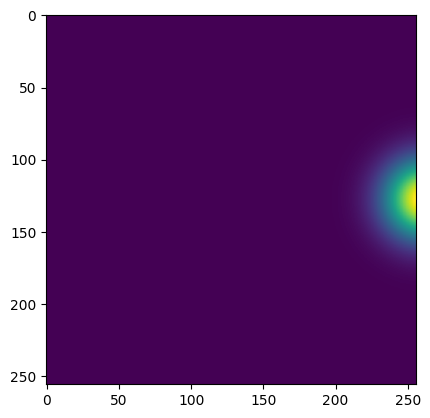

In [191]:
plt.figure()
plt.imshow(np.abs(image))

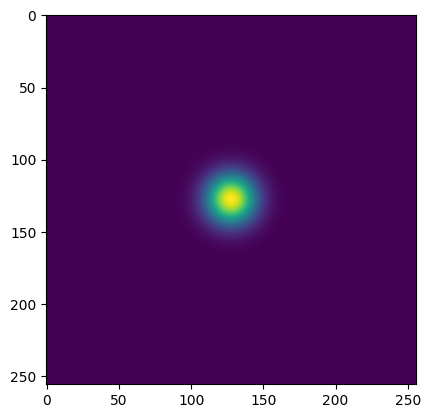

In [192]:
image = model.detector.get_image(rays[0])


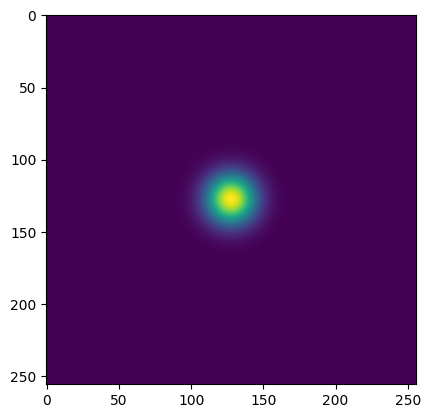

In [196]:
plt.figure()
plt.imshow(np.abs(image))

In [193]:
# AppWindow = QApplication(sys.argv)
# viewer = TemGymWindow(model)
# viewer.show()
# AppWindow.exec()


In [194]:
# model = Model(components)
# rays = tuple(model.run_iter(num_rays=5000))
# image = model.detector.get_image(rays)
# det_x = np.linspace(-det_shape[1]//2*pixel_size, det_shape[1]//2*pixel_size, det_shape[1])

# plt.figure()
# plt.imshow(image)